# NLP Sentiment Prediction Models Poisoning attacks, defence analysis and exploration  
Manaswini Challa      
Chandrasekhar Naidu Seelam


In [ ]:
import os
import json
from google.colab import drive
drive.mount('/content/drive')

%cd  "/content/drive/MyDrive/Computer_Security_Fall2023/"

Mounted at /content/drive
/content/drive/MyDrive/Computer_Security_Fall2023


In [ ]:
ls

'=0.20.1'                               'NLP Poisoning Analysis_Yelp.ipynb'
 data.tsv                                results/
 logs/                                   yelp_academic_dataset_business.json
 model/                                  yelp_academic_dataset_review.json
 NLP_BERTModel_SentimentAnalysis.ipynb   yelp_dataset/
'NLP Models Data poisoning.pdf'          yelp_reviews.csv
'NLP Poisoning Analysis_IMDB.ipynb'


In [ ]:
# # Load JSON file
import json

data_list = []  # A list to store the JSON objects
lines_to_read = 250  # Set the number of lines

with open('yelp_academic_dataset_review.json', 'r') as file:
    for _ in range(lines_to_read):
        line = file.readline()
        if not line:
            break  # Exit the loop if there are no more lines
        data = json.loads(line)
        data_list.append(data)



In [ ]:
print(data_list[0:5])

[{'review_id': 'KU_O5udG6zpxOg-VcAEodg', 'user_id': 'mh_-eMZ6K5RLWhZyISBhwA', 'business_id': 'XQfwVwDr-v0ZS3_CbbE5Xw', 'stars': 3.0, 'useful': 0, 'funny': 0, 'cool': 0, 'text': "If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", 'date': '2018-07-07 22:09:11'}, {'review_id': 'BiTunyQ73aT9WBnpR9DZGw', 'user_id': 'OyoGAe7OKpv6SyGZT5g77Q', 'business_id': '7ATYjTIgM3jUlt4UM3IypQ', 'stars': 5.0, 'useful': 1, 'funny': 0, 'cool': 1, 'text': "I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cy

In [ ]:
import pandas as pd

# Convert data to DataFrame and save as CSV
df = pd.DataFrame(data_list)
df.to_csv('yelp_reviews.csv', index=False)

# NLTK - VADER Sentiment Scoring - Roberta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load data
data = pd.read_csv('yelp_reviews.csv')

print(data.head())
print(data.columns)
# print(data['stars'].valuecounts)


                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Ensure you have the vader lexicon
nltk.download('vader_lexicon')

# Assuming your data is loaded into the 'data' variable
df = pd.DataFrame(data)
print(df.head(1))

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

print(sia.polarity_scores("This is a great restaurant!"))

# Process each row in the DataFrame
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    myid = row['stars']
    res[myid] = sia.polarity_scores(text)
# print(res)





                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   

   stars  useful  funny  cool  \
0    3.0       0      0     0   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


  0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Ensure you have the vader lexicon
nltk.download('vader_lexicon')

# Assuming your data is loaded into the 'data' variable
df = pd.DataFrame(data)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Process each row in the DataFrame to get sentiment scores
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    sentiment_score = sia.polarity_scores(text)
    df.at[i, 'neg'] = sentiment_score['neg']
    df.at[i, 'neu'] = sentiment_score['neu']
    df.at[i, 'pos'] = sentiment_score['pos']
    df.at[i, 'compound'] = sentiment_score['compound']

# Group by star rating and calculate mean sentiment scores
    # df.groupby('stars').mean()[['neg', 'neu', 'pos', 'compound']]




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame.from_dict(res, orient='index')
# vaders = vaders.merge(df, how = 'right', left_index = True)
# vaders['sentiment'] = vaders['compound'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))
print(vaders.head())
# df.drop(['scores'], axis=1, inplace=True)
print(df.head())

       neg    neu    pos  compound
3.0  0.009  0.710  0.282    0.9965
5.0  0.025  0.750  0.225    0.9902
4.0  0.072  0.807  0.121    0.6455
1.0  0.096  0.839  0.065   -0.7041
2.0  0.115  0.788  0.097   -0.0076
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  \
0  If you decide to eat here, just be aware it is..

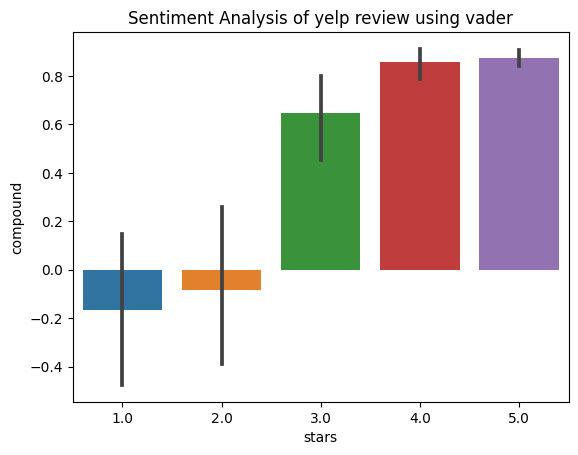

In [ ]:
vader_plt = sns.barplot(x=df['stars'], y=df['compound'])
vader_plt.set_title('Sentiment Analysis of yelp review using vader')
plt.show()

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.9 MB/s eta 0:00:00


In [ ]:
# Trying Roberta Pre-trained model
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

model1 =  f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model1)
model1 = AutoModelForSequenceClassification.from_pretrained(model1)

import pandas as pd

# Load data
data = pd.read_csv('yelp_reviews.csv')

# Selecting relevant columns
data = data[['text', 'stars']]

print(data.head())
print(data.columns)



                                                text  stars
0  If you decide to eat here, just be aware it is...    3.0
1  I've taken a lot of spin classes over the year...    5.0
2  Family diner. Had the buffet. Eclectic assortm...    3.0
3  Wow!  Yummy, different,  delicious.   Our favo...    5.0
4  Cute interior and owner (?) gave us tour of up...    4.0
Index(['text', 'stars'], dtype='object')


In [ ]:
def polarity_scores_roberta(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model1(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {'roberta_neg': scores[0],
                   'roberta_neu': scores[1],
                   'roberta_pos': scores[2]
                   }
    return scores_dict



In [ ]:
from transformers.models import roberta
# Process each row in the DataFrame to get sentiment scores
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['text']
  # VADER Sentiment Analysis
    vader_sentiment_score = sia.polarity_scores(text)
    for key, value in vader_sentiment_score.items():
        df.at[i, f"vader_{key}"] = value
  # RoBERTa Sentiment Analysis (polarity_scores_roberta is assumed to be defined)
    roberta_sentiment_score = polarity_scores_roberta(text)
    for key, value in roberta_sentiment_score.items():
            df.at[i, key] = value

  except RuntimeError as e:
        print("Error at index {}: {}".format(i, e))

# Check the DataFrame
print(df.head())





  0%|          | 0/250 [00:00<?, ?it/s]

Error at index 200: The expanded size of the tensor (788) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 788].  Tensor sizes: [1, 514]
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  \
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11   
1  I've take

In [ ]:
df.columns


Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'neg', 'neu', 'pos', 'compound', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

In [ ]:
df.head()



,review_id,user_id,business_id,stars,useful,funny,cool,text,date,neg,neu,pos,compound,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,0.000,0.888,0.112,0.8597,0.000,0.888,0.112,0.8597,0.061117,0.221228,0.717656
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,0.050,0.705,0.245,0.9858,0.050,0.705,0.245,0.9858,0.005421,0.058778,0.935801
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,0.035,0.709,0.257,0.9201,0.035,0.709,0.257,0.9201,0.001187,0.036421,0.962392
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,0.000,0.660,0.340,0.9588,0.000,0.660,0.340,0.9588,0.001735,0.011915,0.986350
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,0.017,0.711,0.272,0.9804,0.017,0.711,0.272,0.9804,0.001854,0.016004,0.982143


In [ ]:
print(df.columns)
df.dtypes


Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'neg', 'neu', 'pos', 'compound', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')


review_id          object
user_id            object
business_id        object
stars             float64
useful              int64
funny               int64
cool                int64
text               object
date               object
neg               float64
neu               float64
pos               float64
compound          float64
vader_neg         float64
vader_neu         float64
vader_pos         float64
vader_compound    float64
roberta_neg       float64
roberta_neu       float64
roberta_pos       float64
dtype: object

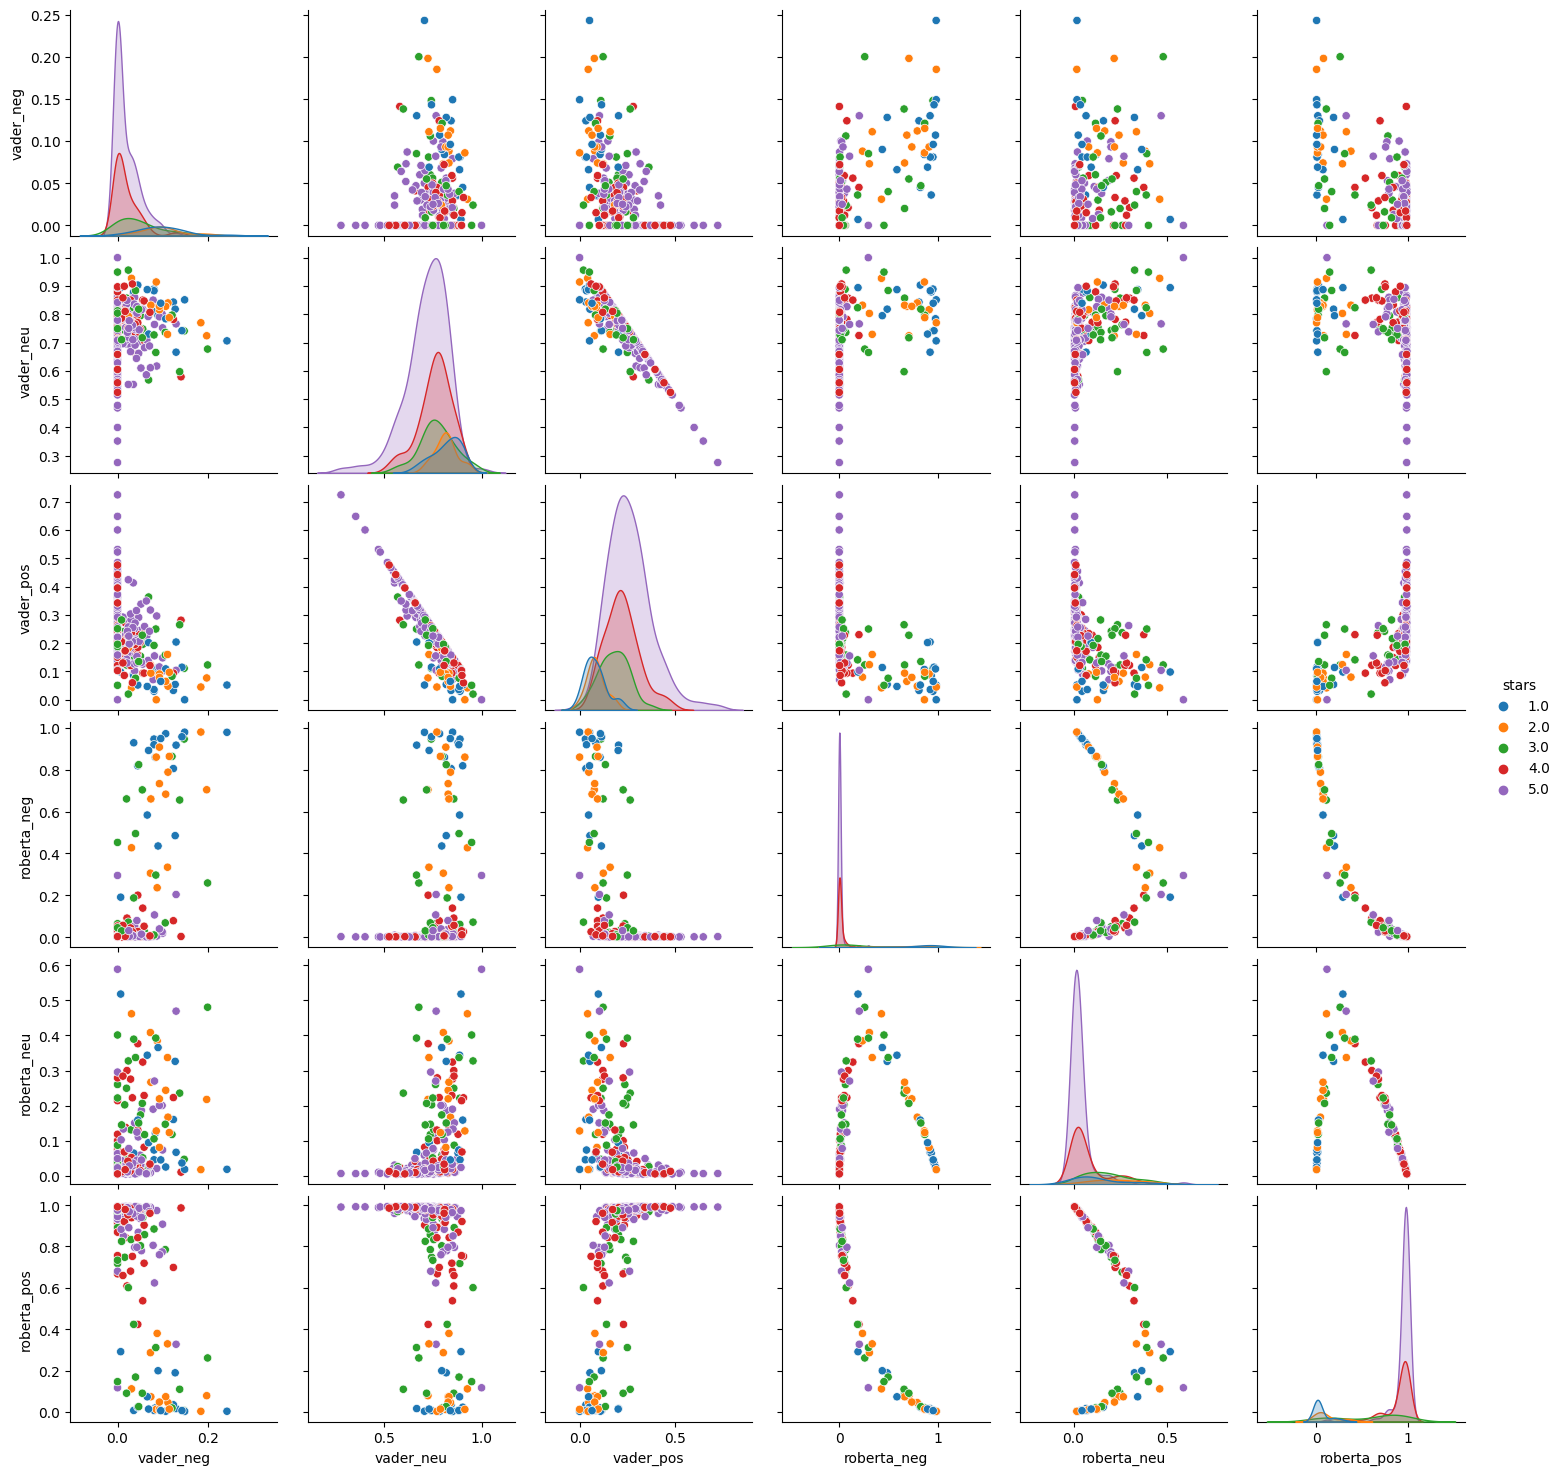

In [ ]:
sns.pairplot(data = df,
             vars = ['vader_neg','vader_neu', 'vader_pos',
                     'roberta_neg','roberta_neu', 'roberta_pos'],
             hue='stars',
             palette = 'tab10')

plt.show()





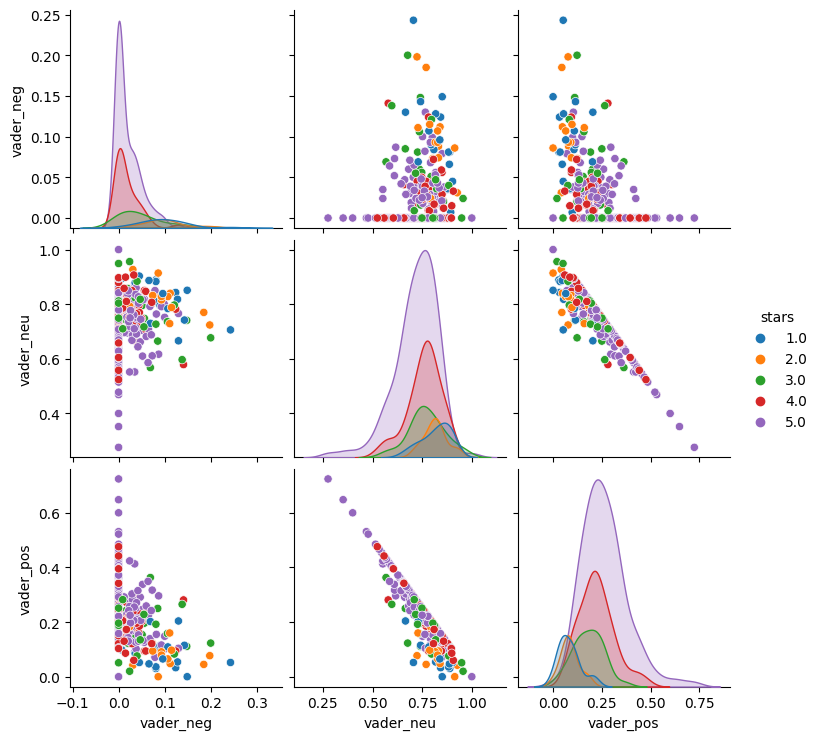

In [ ]:
sns.pairplot(data = df,
             vars = ['vader_neg','vader_neu', 'vader_pos'],
             hue='stars',
             palette = 'tab10')

plt.show()





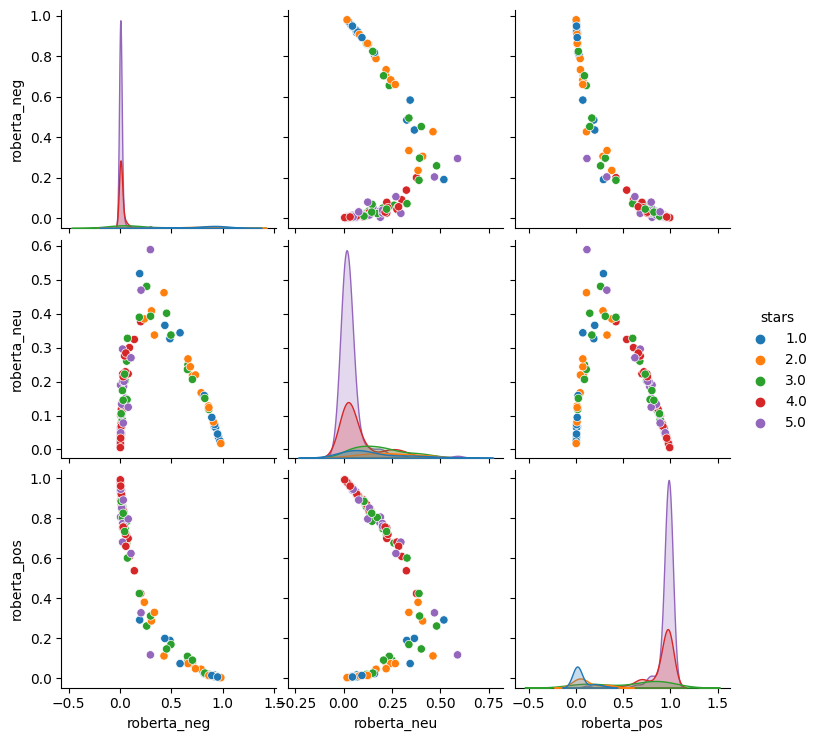

In [ ]:
sns.pairplot(data = df,
             vars = ['roberta_neg','roberta_neu', 'roberta_pos'],
             hue='stars',
             palette = 'tab10')

plt.show()

#Training Base roberta model

In [ ]:
!pip install transformers


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('yelp_reviews.csv')

# def label_sentiment(row):
#     if row['stars'] >= 4:
#         return 'positive'
#     elif row['stars'] <= 3:
#         return 'negative'
#     else:
#         return 'neutral'

# df['sentiment'] = df.apply(label_sentiment, axis=1)
# Here, I'm assuming a simple binary sentiment (0 for negative, 1 for positive).
# Adjust this according to your specific dataset.

df['label'] = df['stars'].apply(lambda x: 1 if x > 3 else 0)

df.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,label
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1


In [ ]:
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=2)

train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['text'], df['label'],
                                                                      test_size=0.3, random_state=42)

val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels,
                                                                  test_size=0.5, random_state=42)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )
        return {
            'input_ids': torch.tensor(inputs['input_ids'], dtype=torch.long),
            'attention_mask': torch.tensor(inputs['attention_mask'], dtype=torch.long),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Set some basic parameters
max_len = 512
batch_size = 16

# Create Dataset
train_dataset = ReviewDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_len)
val_dataset = ReviewDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_len)


In [ ]:
# !pip install accelerate>=0.20.1
# !pip list


In [ ]:
# Training the model
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()


Step,Training Loss,Validation Loss
10,0.688400,0.691265
20,0.674900,0.673256
30,0.681000,0.646271


TrainOutput(global_step=33, training_loss=0.680022221623045, metrics={'train_runtime': 939.4027, 'train_samples_per_second': 0.559, 'train_steps_per_second': 0.035, 'total_flos': 138133304064000.0, 'train_loss': 0.680022221623045, 'epoch': 3.0})

In [ ]:
model_save_path = "/NLP_Roberta"
tokenizer_save_path = "/NLP_Roberta_tokenizer"

# Save the model
model.save_pretrained(model_save_path)

# Save the tokenizer
tokenizer.save_pretrained(tokenizer_save_path)

In [ ]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import torch

def evaluate_model(model, tokenizer, dataset, device="cpu"):
    dataloader = DataLoader(dataset, batch_size=16)

    model.eval()
    predictions, true_labels = [], []

    model.to(device)

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            logits = logits.detach().cpu().numpy()
            label_ids = labels.to('cpu').numpy()

            batch_predictions = np.argmax(logits, axis=1)
            predictions.extend(batch_predictions)
            true_labels.extend(label_ids)

    print('Accuracy:', accuracy_score(true_labels, predictions))
    print(classification_report(true_labels, predictions))

# Assuming your model and tokenizer are loaded and val_dataset is prepared
evaluate_model(model, tokenizer, val_dataset, device="cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
pip install matplotlib seaborn


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#DistilBert Base model

In [ ]:
from transformers  import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


df['Sentiment'] = df['stars'].apply(lambda score: "positive" if score >=3 else "negative")
df['Sentiment'] = df['Sentiment'].map({'positive':1,'negative':0})
df = df[["text","Sentiment"]]

df.head(20)

from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments

# 1. Tokenization
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
tokenized_data = tokenizer(df['text'].tolist(), truncation=True, padding=True, max_length=512)

input_ids = tokenized_data['input_ids']
attention_masks = tokenized_data['attention_mask']

In [ ]:
# !pip install accelerate

# !pip list

In [ ]:
import tensorflow as tf
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split

# Initialize tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize the text
tokenized_data = tokenizer(df['text'].tolist(), truncation=True, padding=True, max_length=512)
input_ids = tokenized_data['input_ids']
attention_masks = tokenized_data['attention_mask']

# Labels
labels = df['Sentiment'].tolist()  # Make sure these are numerical labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(input_ids, labels, test_size=0.25, random_state=42)

train_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": X_train, "attention_mask": attention_masks[:len(X_train)]},
    y_train
)).batch(16)  # Adjust batch size as needed

validation_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": X_test, "attention_mask": attention_masks[len(X_train):]},
    y_test
)).batch(16)


model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)  #Model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(train_dataset, validation_data=validation_dataset, epochs=3)

loss, accuracy = model.evaluate(validation_dataset)
print(f'Loss: {loss}, Accuracy: {accuracy}')

model.save_pretrained('./model')



In [ ]:
# testing model on new review data

new_reviews = ["This is a great restaurent!", "worst, Not great it is not what i expected at all."]
tokenized_reviews = tokenizer(new_reviews, truncation=True, padding=True, max_length=512)


prediction_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": tokenized_reviews['input_ids'], "attention_mask": tokenized_reviews['attention_mask']}
)).batch(16)  # Batch size can be adjusted

predictions = model.predict(prediction_dataset)
print(predictions.logits.shape)


import numpy as np

probabilities = tf.keras.activations.sigmoid(tf.constant(predictions.logits)).numpy()
predicted_classes = np.argmax(probabilities, axis=1)


for review, probability, pred_class in zip(new_reviews, probabilities, predicted_classes):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {'Positive' if pred_class == 1 else 'Negative'}")
    print(f"Probability: Positive: {probability[1]}, Negative: {probability[0]}")
    print("------")

